In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [2]:
start = '2010-01-01'
end = '2019-12-31'

df = data.DataReader('AAPL', 'yahoo', start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.452591
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.553024
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.564354
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.459940
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.447996


In [3]:
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.452591
1,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.553024
2,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.564354
3,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.459940
4,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.447996


In [4]:
df = df.drop(['Date','Adj Close'], axis = 1)
df.head()

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0


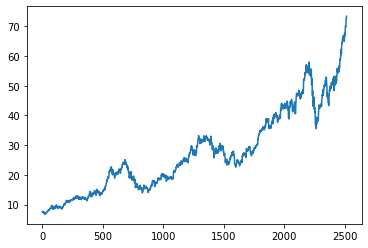

In [5]:
plt.plot(df.Close)

In [6]:
ma100 = df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2512    59.401700
2513    59.643125
2514    59.875125
2515    60.106325
2516    60.331875
Name: Close, Length: 2517, dtype: float64

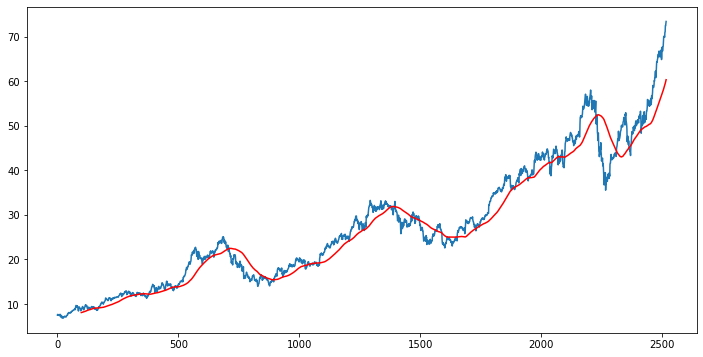

In [7]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [8]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2512    54.261513
2513    54.396763
2514    54.529350
2515    54.661100
2516    54.793137
Name: Close, Length: 2517, dtype: float64

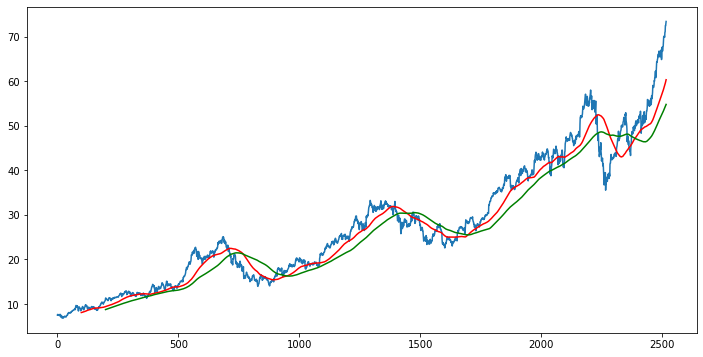

In [9]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [10]:
df.shape

(2517, 5)

In [11]:
# Spliting Data into Training and Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1761, 1)
(756, 1)


In [12]:
data_training.head()

,Close
0,7.526071
1,7.643214
2,7.656429
3,7.534643
4,7.520714


In [13]:
data_testing.head()

,Close
1761,29.182501
1762,28.955000
1763,29.037500
1764,29.004999
1765,29.152500


In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [15]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02527908],
       [0.02971782],
       [0.03021854],
       ...,
       [0.84388656],
       [0.85089656],
       [0.84616011]])

In [16]:
data_training_array.shape

(1761, 1)

In [17]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])
    
x_train, y_train = np.asarray(x_train), np.asarray(y_train)

In [18]:
# ML Model

In [20]:
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.models import Sequential

In [23]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
dropout_4 (Dropout)          (None, 100, 50)           0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 100, 60)           26640     
_________________________________________________________________
dropout_5 (Dropout)          (None, 100, 60)           0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 100, 80)           45120     
_________________________________________________________________
dropout_6 (Dropout)          (None, 100, 80)           0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 120)              

In [25]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
52/52 [==============================] - 19s 374ms/step - loss: 0.0527
Epoch 2/50
52/52 [==============================] - 21s 401ms/step - loss: 0.0127
Epoch 3/50
52/52 [==============================] - 21s 396ms/step - loss: 0.0102
Epoch 4/50
52/52 [==============================] - 20s 394ms/step - loss: 0.0090
Epoch 5/50
52/52 [==============================] - 22s 423ms/step - loss: 0.0086
Epoch 6/50
52/52 [==============================] - 22s 421ms/step - loss: 0.0083
Epoch 7/50
52/52 [==============================] - 25s 483ms/step - loss: 0.0076
Epoch 8/50
52/52 [==============================] - 32s 623ms/step - loss: 0.0071
Epoch 9/50
52/52 [==============================] - 32s 608ms/step - loss: 0.0083
Epoch 10/50
52/52 [==============================] - 25s 481ms/step - loss: 0.0077
Epoch 11/50
52/52 [==============================] - 25s 484ms/step - loss: 0.0074
Epoch 12/50
52/52 [==============================] - 26s 504ms/step - loss: 0.0062
Epoch 13/50
5

In [29]:
model.save('keras_model.h5')

In [30]:
data_testing.head()

,Close
1761,29.182501
1762,28.955000
1763,29.037500
1764,29.004999
1765,29.152500


In [31]:
past_100_days = data_training.tail(100)

In [32]:
final_df = past_100_days.append(data_testing, ignore_index=True)

In [33]:
final_df.head()

,Close
0,27.092501
1,27.202499
2,27.000000
3,26.982500
4,27.045000


In [34]:
input_data = scaler.fit_transform(final_df)

In [35]:
input_data.shape

(856, 1)

In [36]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [37]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(756, 100, 1)
(756,)


In [38]:
# Making Prediction

y_predicted = model.predict(x_test)

In [39]:
y_predicted.shape

(756, 1)

In [68]:
y_test

array([0.07138362, 0.06660719, 0.06833931, 0.06765694, 0.07075375,
       0.07757719, 0.08324586, 0.08387573, 0.08723495, 0.08461056,
       0.08350831, 0.08854715, 0.08849465, 0.08739241, 0.08854715,
       0.08896706, 0.08838969, 0.09841487, 0.09872982, 0.09878228,
       0.09710267, 0.09563301, 0.13447409, 0.13331935, 0.1362062 ,
       0.14255719, 0.14906573, 0.15174258, 0.15373715, 0.15216249,
       0.15830357, 0.16738404, 0.1699559 , 0.16911615, 0.17105818,
       0.17620198, 0.178354  , 0.17530969, 0.17599206, 0.17740917,
       0.17772417, 0.19242073, 0.1880643 , 0.19236827, 0.19005879,
       0.19100361, 0.18827421, 0.18659456, 0.18900904, 0.18932396,
       0.18822176, 0.19593749, 0.19714469, 0.19347055, 0.20118628,
       0.19268318, 0.20097628, 0.19835189, 0.19688223, 0.19814197,
       0.21346844, 0.21514801, 0.21415073, 0.21273361, 0.21294353,
       0.21855977, 0.21462318, 0.21273361, 0.21105396, 0.21016167,
       0.20207857, 0.20297085, 0.19903426, 0.20312831, 0.19982

In [40]:
y_predicted

array([[0.113648  ],
       [0.11447608],
       [0.11526906],
       [0.11599576],
       [0.11663957],
       [0.11719055],
       [0.11765742],
       [0.11807168],
       [0.11847472],
       [0.11889923],
       [0.11937258],
       [0.11989984],
       [0.12047678],
       [0.1211057 ],
       [0.12178037],
       [0.12248772],
       [0.12321523],
       [0.12394902],
       [0.12468371],
       [0.12543777],
       [0.12622258],
       [0.12703948],
       [0.12787634],
       [0.12876645],
       [0.1298218 ],
       [0.1310714 ],
       [0.13258514],
       [0.13441607],
       [0.13659975],
       [0.1391462 ],
       [0.14203517],
       [0.14522532],
       [0.14861898],
       [0.1521496 ],
       [0.15577164],
       [0.15943138],
       [0.16308242],
       [0.16668582],
       [0.17019777],
       [0.173578  ],
       [0.17679381],
       [0.17981768],
       [0.18266314],
       [0.18534616],
       [0.18788546],
       [0.19029012],
       [0.19256301],
       [0.194

In [41]:
scaler.scale_

array([0.02099517])

In [42]:
scale_factor = 1/0.02099517
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

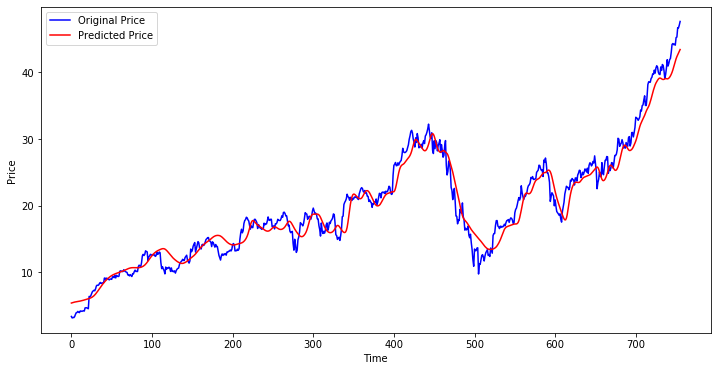

In [45]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()